In [51]:
#THaW Project
#This program is meant to establish the accuracy of predicting device name from the data collected by MSU
#6/12/2019
#Code Written By: Manzi Bryan with a lot of help from https://www.kaggle.com/nageshnaik/iris-dataset-classfication-using-naive-bayes
# This code should be submitted for review 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import sklearn
from sklearn import model_selection
from sklearn.model_selection import *
import pylab as pl
import pandas as pd
import os
import math
import numpy as np
import warnings
import pickle
from pprint import pprint# Look at parameters used by our current forest
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
target = 'Device'


# This method is meant to build a Random Forest Classifier given a dataframe with devices as targets
# The dontTrainOn parameter is meant to tell the classifier to leave one tenth of one device out of training

# This method is meant to build a Random Forest Classifier given a dataframe with devices as targets

def makeClassifier(df, functionName, clf, labels, f1Dataframe = None, i= None,):
    
    inTestingMode = not (f1Dataframe == None and i == None)
    devices = df[target].unique()
    copydf = df.copy()
    
    copydf[target].replace(devices, range(0, len(devices)), inplace=True)
        
    Y = copydf[target].tolist()
    
    
    #Remove labelling columns from the index
    copydf = copydf.drop(columns= labels)
    X = copydf.values
    
    
    #One tenth of the data as test
    validation_size = 0.1
    
    seed = 7
    
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                    test_size=validation_size, random_state=seed)
    
    scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
            'f1_macro' : 'f1_macro'}

    
    #Fitting the training set
    selector = RFE(clf, n_features_to_select=1, step=1)
    selector = selector.fit(X_train, Y_train)
    
    clf.fit(X_train, Y_train) 
    
   
    #Model Performance
#     #setting performance parameters
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed) #same number of samples from each 

    #calling the cross validation function
    
    cv_results = cross_validate(clf, X_train, Y_train, cv=kfold, scoring=scoring, return_train_score=True)
    

    
    if not inTestingMode:
        filename = functionName  + 'Model.sav' # Save Classifier
#         pickle.dump(clf, open(filename, 'wb'))
#         for metric in cv_results.keys():
#             print(metric + ": " + str(cv_results[metric].mean()))
#         print('\n')
        
        
    else:
        f1Dataframe['Classifier'][i] = functionName
        f1Dataframe['f1'][i] = str(cv_results['test_f1_macro'].mean())
    
    return selector.ranking_, cv_results['test_acc'].mean(), cv_results['test_f1_macro'].mean(), copydf.columns
    
def makeOneClassifier(df, labels):
    n_est = 15
    depth = 15
    name = 'RandomForest d=' + str(depth) + ' n_est=' + str(n_est)
    classifier = RandomForestClassifier(n_estimators=n_est, max_depth=depth, random_state=42)
    

    devices = df[target].unique()
#     df = pd.read_excel(path)

    df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)#Remove unnecessary columns from the dataframe
    numFeatures = []
    accuracys = []
    f1s = []
    ranking, accuracy, f1, columns = makeClassifier(df, name, classifier, labels)
    accuracys.append(accuracy)
    f1s.append(f1)
    i = 0
    while i < 35:
        worstFeature = np.argmax(ranking) # returns the indices of the largest value
        labels.append(columns[worstFeature])
        ranking = np.delete(ranking, worstFeature) 
        columns = columns.delete(worstFeature)
#         ranking, accuracy, f1, columns = makeClassifier(df, name, classifier, labels)
#         accuracys.append(accuracy)
#         f1s.append(f1)
#         print("accuracys = " + str(accuracys))
#         print("f1s = " + str(f1s))
        i += 1
    
    print("final features used are")
    final_table_columns = list(columns)
    final_table_columns += ['Device','Model','App','Distance', 'Bursts'] # Create an efficient training 
    print(final_table_columns)
    efficientTrain = df[df.columns.intersection(final_table_columns)]
    efficientTrain.to_excel('efficientTrain.xlsx')
    
    testPath= r'C:\Users\brnma\test.xlsx'
    testdf = pd.read_excel(testPath)
    efficientTest = testdf[testdf.columns.intersection(final_table_columns)]
    efficientTest.to_excel('efficientTest.xlsx')
    
    
    print("throwaway features are ")
    print(labels)
    
    return devices
    
if __name__ == "__main__":
    
    path=r'C:\Users\brnma\train.xlsx'
    
    print("About to read...")
    traindf = pd.read_excel(path) 
    print("...read")
    traindf = traindf.reindex(sorted(traindf.columns), axis=1)
    traindf = traindf.drop(['Burst Width', 'Amplitude__length'], axis=1)
    
    labels = ['Device','Model','App','Distance', 'Bursts']
    makeOneClassifier(traindf, labels)
#     print("Done")

    

About to read...
...read
final features used are
['Amplitude__count_above_mean', 'Amplitude__index_mass_quantile__q_0.4', 'Amplitude__index_mass_quantile__q_0.7', 'Amplitude__longest_strike_above_mean', 'Amplitude__number_cwt_peaks__n_1', 'Amplitude__number_peaks__n_1', 'Amplitude__number_peaks__n_10', 'Amplitude__number_peaks__n_3', 'Amplitude__number_peaks__n_5', 'Amplitude__ratio_beyond_r_sigma__r_0.5', 'Amplitude__ratio_beyond_r_sigma__r_1', 'Device', 'Model', 'App', 'Distance', 'Bursts']
throwaway features are 
['Device', 'Model', 'App', 'Distance', 'Bursts', 'Amplitude__symmetry_looking__r_0.1', 'Amplitude__last_location_of_maximum', 'Amplitude__augmented_dickey_fuller__attr_"usedlag"', 'Amplitude__augmented_dickey_fuller__attr_"teststat"', 'Amplitude__autocorrelation__lag_5', 'Amplitude__fft_aggregated__aggtype_"skew"', 'Amplitude__autocorrelation__lag_8', 'Amplitude__ratio_beyond_r_sigma__r_6', 'Amplitude__autocorrelation__lag_4', 'Amplitude__cid_ce__normalize_False', 'Amplitud

33
0.9472013911202929


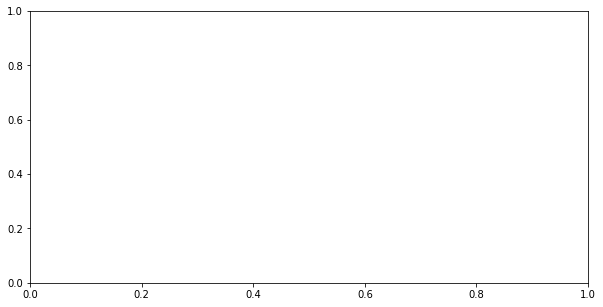

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 5, forward=True)
x = list(range(0, 45))
f1s = [0.9193162379906983, 0.9195561288407166, 0.9173424482182865, 0.9182753574862857, 0.9214811293728985, 0.9217425502928418, 0.9216548015461272, 0.9223759848605646, 0.9175566483826649, 0.9173319445306719, 0.9258443647727148, 0.9182319152314617, 0.9202790946565116, 0.914789946990972, 0.9213143072885248, 0.9217401921226358, 0.9174140904595489, 0.9217002740885633, 0.9240448410164573, 0.9191921075094471, 0.923080179870835, 0.9217376736887806, 0.918969771190772, 0.924501725810414, 0.9168913343086516, 0.9211066051927028, 0.9211482866442575, 0.9230830944438028, 0.9239474531025509, 0.9237557941743134, 0.9231374162288628, 0.9227230243056359, 0.9218518600996817, 0.9252847896144845, 0.9145614406144027, 0.9193265296081391, 0.9104086927312199, 0.9132199750507745, 0.9053480269129504, 0.9129993168860334, 0.9018373898097938, 0.8901587591029665, 0.8672729747875227, 0.8548041953336565, 0.8171489629342832]
accuracys = [0.9415575031383747, 0.9417484885755025, 0.9370568136759168, 0.9396994572418077, 0.9434604358340893, 0.9412041130722442, 0.9421685483472597, 0.9436754283981695, 0.9411910390902797, 0.939530085409468, 0.9457118571646266, 0.9415732154457708, 0.9440321166726703, 0.9397243543699627, 0.9413574479735516, 0.9415532719654017, 0.941035365699437, 0.9453243556379458, 0.9449474514134083, 0.9406329016659407, 0.944992398615119, 0.9430493512411993, 0.9410219677360165, 0.9462773132047904, 0.943817863346587, 0.9428670915150983, 0.9426868120408374, 0.9451438320781325, 0.9455195291834354, 0.9455041847832033, 0.9464579873050495, 0.9451482787700325, 0.9470147622831716, 0.9472013911202929, 0.9408340552691096, 0.9426805514903507, 0.9365035468508601, 0.9383837449589049, 0.9346288361840008, 0.9365139348658283, 0.931054045140011, 0.9155000372923503, 0.8953858620624204, 0.8839225629734541, 0.8568972169253488]
max_value = max(accuracys)
max_index = accuracys.index(max_value)
print(max_index)
print(max_value)
# accuracys.reverse()
# f1s.reverse()

# label_acc= "Accuracy"

# line1, = ax.plot(x, accuracys, label=label_acc)

# label_f1= "F1"
# line2, = ax.plot(x, f1s, label=label_f1)

# print(accuracys[9])
# print(f1s[9])
# plt.ylabel('Performance')
# plt.xlabel('Number of Features')

# first_legend = plt.legend(handles=[line1, line2], loc='lower right')

# # Add the legend manually to the current Axes.


# ax.set_title('Perfomance of Random Forest as Number of Features Varied')

# ax = plt.gca().add_artist(first_legend)